# Explore here

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

Iniciar la biblioteca Spotipy

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

Realizar solicitudes a la API

In [4]:
artist_id = "0Q8NcsJwoCbZOHHW63su5S"

results = spotify.artist_top_tracks(artist_id)

songs = []
for track in results['tracks']:
    songs.append({
        "name": track["name"],
        "popularity": track["popularity"],
        "duration_min": track["duration_ms"] / 60000
    })

Transformar a Pandas DataFrame

In [13]:
songs_df = pd.DataFrame(songs)

print(songs_df.head(5))

                name  popularity  duration_min
0              DROGA          85      3.710433
1             AURORA          85      3.214217
2  DETRÁS DE TU ALMA          85      3.950000
3       MÁS QUE ALGO          82      4.038433
4        LA INOCENTE          82      3.369550


Analizar la relación estadística

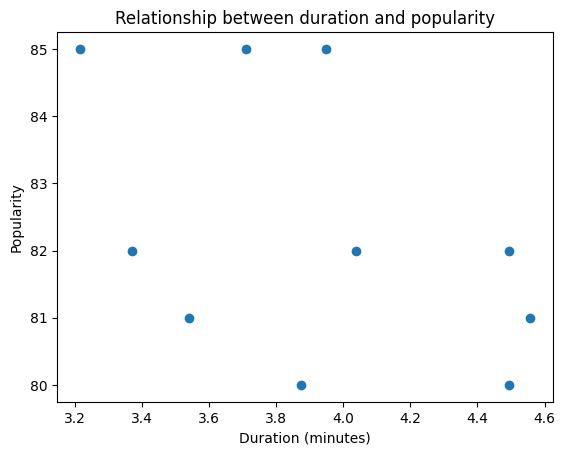

In [14]:
plt.scatter(songs_df['duration_min'], songs_df['popularity'])
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.title('Relationship between duration and popularity')
plt.show()

Como se puede observar, no guarda ninguna relación la duración de la canción con su popularidad.